#**REDWINE_QUALITY_Decisiontree**

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [1]:
# Sklearn Wine Quality

from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
# Import the pandas library and alias it as pd
import pandas as pd

# Create dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [4]:
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
# cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
df.nunique()

,0
alcohol,126
malic_acid,133
ash,79
alcalinity_of_ash,63
magnesium,53
total_phenols,97
flavanoids,132
nonflavanoid_phenols,39
proanthocyanins,101
color_intensity,132


In [9]:
# Import the pandas library and alias it as pd
import pandas as pd
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
# y_pred
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [19]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
# prediction
y_pred2 = dt.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



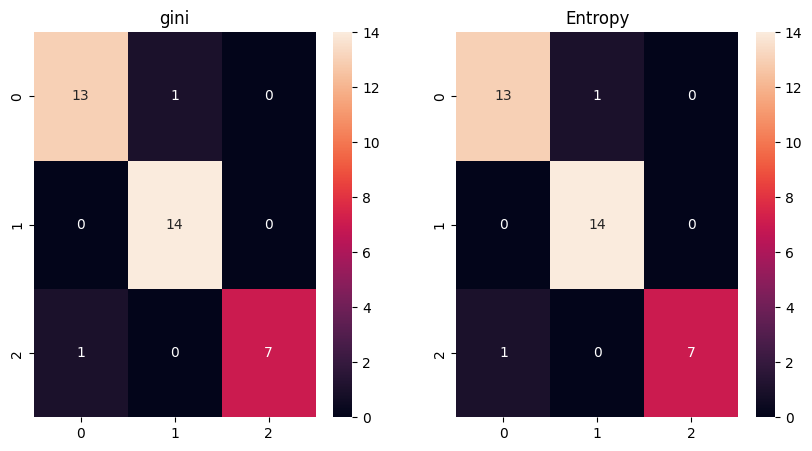

Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [25]:
# Plot Confusion Matrix
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
import seaborn as sns # Import the seaborn library for heatmap plotting
plt.figure(figsize=(10,5))

# Confusion Matrix for 'Gini'
plt.subplot(1,2,1)
cm_gini = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
sns.heatmap(cm_gini, annot=True) # Use sns.heatmap to plot the confusion matrix
plt.title('gini')

# Confusion Matrix for 'Entropy'
plt.subplot(1,2,2)
cm_entropy = confusion_matrix(y_test, y_pred2) # Calculate confusion matrix
sns.heatmap(cm_entropy, annot=True) # Use sns.heatmap to plot the confusion matrix
plt.title('Entropy')

plt.show()

# Print Classification Reports
print("Classification Report (Gini):\n", classification_report(y_test, y_pred))
print("\nClassification Report (Entropy):\n", classification_report(y_test, y_pred2))

<ipython-input-26-7c988f931920>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


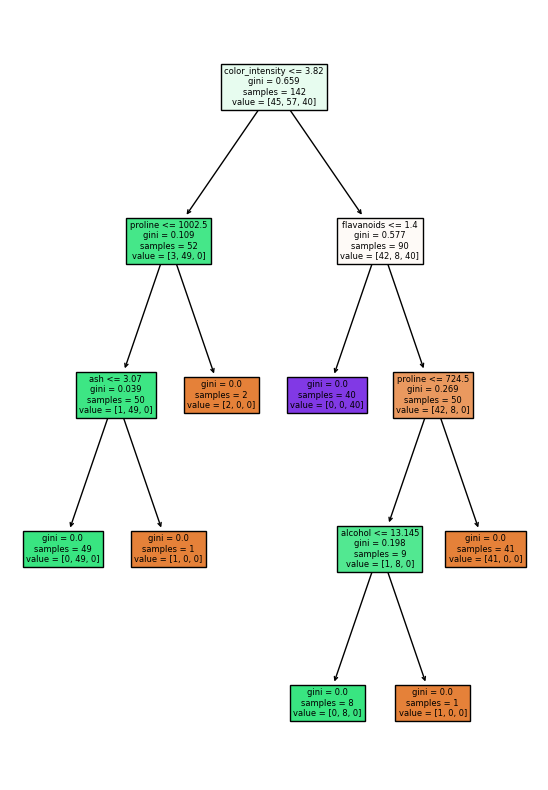

In [26]:
# visualize the tree
plt.figure(figsize=(15,10))
from sklearn import tree
tree.plot_tree(dt, filled=True)

plt.subplot(1,2,2)
tree.plot_tree(dt, filled=True, feature_names=wine.feature_names)
plt.show()